In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import pandas as pd

import seaborn as sns
from latexify import latexify, format_axes

/home/fl350/.pyenv/versions/2.7.11/envs/jupyter/lib/python2.7/site-packages/matplotlib/__init__.py:1350: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


In [3]:
data = pd\
.read_csv('/home/fl350/bachbot/scratch/harm_results.csv', names=['Error Type', 'Predicted Parts', 'Accuracy'])\
.assign(err=lambda x: 1 - x.Accuracy)\
.rename(columns={'err': 'Error Rate'})
data

,Error Type,Predicted Parts,Accuracy,Error Rate
0,TER,A,0.558236,0.441764
1,TER,B,0.758904,0.241096
2,TER,ATB,0.281959,0.718041
3,TER,S,0.468421,0.531579
4,TER,AT,0.313627,0.686373
5,TER,T,0.764706,0.235294
6,FER,A,0.558236,0.441764
7,FER,B,0.758904,0.241096
8,FER,ATB,0.121774,0.878226
9,FER,S,0.468421,0.531579


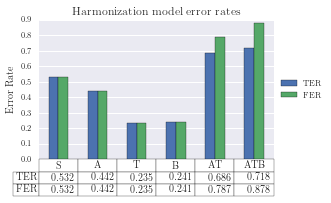

In [4]:
latexify(fig_width=4)

ax = pd.pivot_table(data, values='Error Rate', index=['Predicted Parts'], columns=['Error Type'])\
.round(3)\
[['TER', 'FER']]\
.loc[['S', 'A', 'T', 'B', 'AT', 'ATB']]\
.plot.bar(table=True)
ax.set_title('Harmonization model error rates')
ax.set_ylabel('Error Rate')
ax.get_xaxis().set_visible(False)   # Hide Ticks

#ax.legend(title="", loc='best')
# Shrink current axis by 20%, add legend to left
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(title="", loc='center left', bbox_to_anchor=(1, 0.5))

plt.tight_layout()
plt.savefig('harmonization-results.pgf', bbox_inches='tight', dpi=300)
plt.show()